In [21]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn import linear_model
sns.set_style('white')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.graphics.gofplots import ProbPlot


In [2]:
auto = pd.read_csv('../data/Auto.csv', na_values = ['?'])

In [3]:
auto_simple_mod = smf.ols(formula = 'mpg ~ horsepower', data = auto)
auto_simple_fit = auto_simple_mod.fit()
print(auto_simple_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 30 Nov 2017   Prob (F-statistic):           7.03e-81
Time:                        14:37:35   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

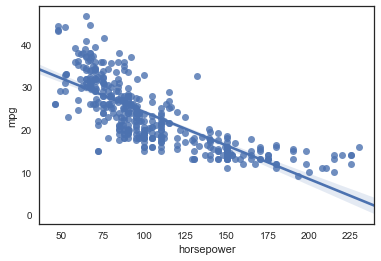

In [4]:
sns.regplot(auto.horsepower, auto.mpg)

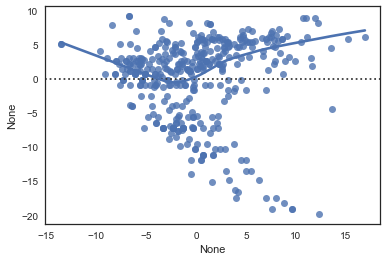

In [5]:
sns.residplot(auto_simple_fit.resid, auto_simple_fit.fittedvalues, lowess = True)

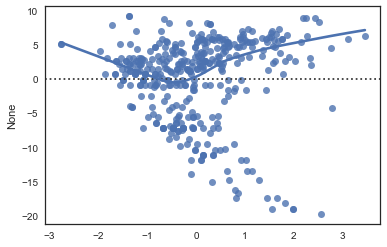

In [6]:
sns.residplot(auto_simple_fit.get_influence().resid_studentized_internal, auto_simple_fit.fittedvalues, lowess = True)

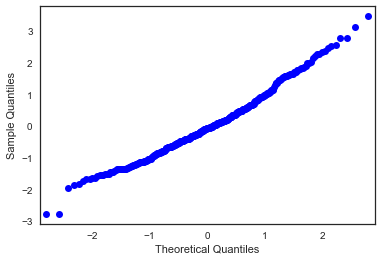

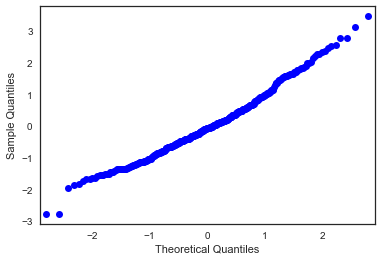

In [14]:
QQ = ProbPlot(auto_simple_fit.get_influence().resid_studentized_internal)
QQ.qqplot()

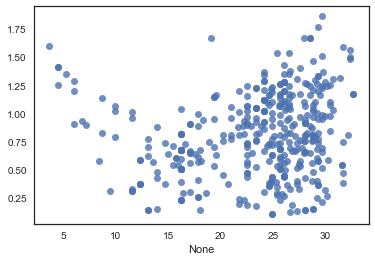

In [16]:
sns.regplot(auto_simple_fit.fittedvalues, np.sqrt(np.abs(auto_simple_fit.get_influence().resid_studentized_internal)), fit_reg = False, lowess = True)

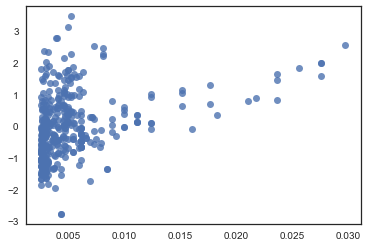

In [18]:
sns.regplot(auto_simple_fit.get_influence().hat_matrix_diag, auto_simple_fit.get_influence().resid_studentized_internal, fit_reg = False)

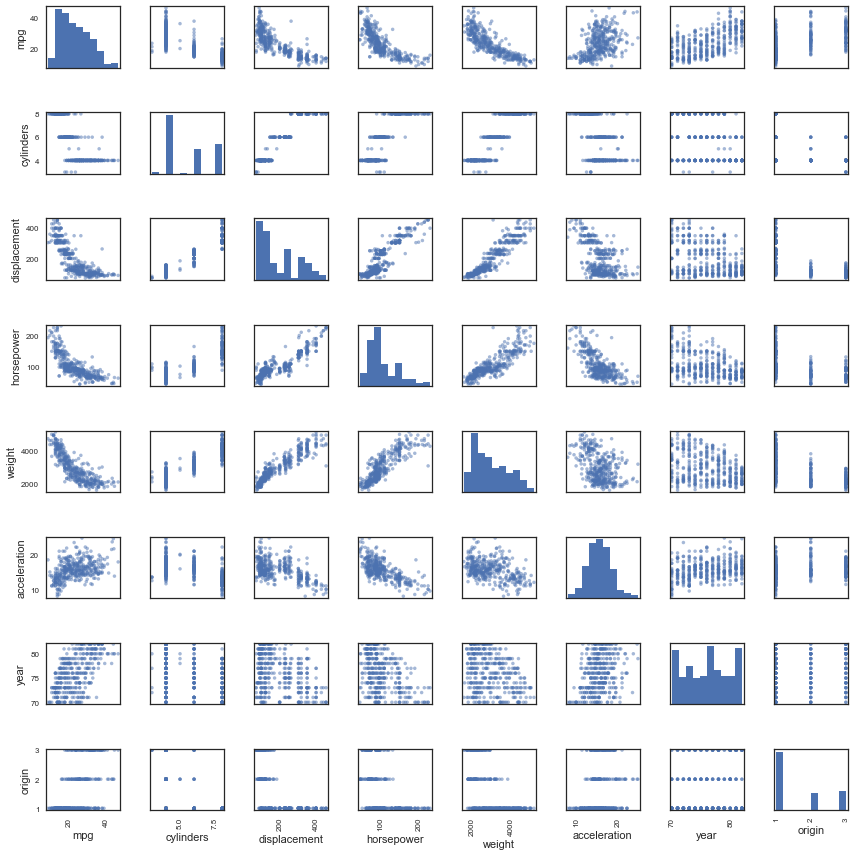

In [8]:
ax = pd.plotting.scatter_matrix(auto)
plt.tight_layout(rect = (0,0,2,3))
plt.show()

In [9]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


In [10]:
auto_no_na = auto.dropna()
auto_x = auto_no_na.drop(['mpg', 'name'], axis = 1)
auto_x = sm.add_constant(auto_x)
auto_y = auto_no_na.mpg
auto_multi_mod = sm.OLS(auto_y, auto_x).fit()

In [11]:
auto_multi_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 30 Nov 2017   Prob (F-statistic):          2.04e-139
Time:                        14:37:43   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 30 Nov 2017   Prob (F-statistic):           5.40e-99
Time:                        14:55:42   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1

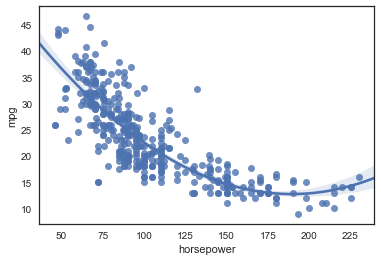

In [19]:
auto_quad_mod = smf.ols(formula = 'mpg ~ horsepower + I(horsepower**2)', data = auto)
auto_quad_fit = auto_quad_mod.fit()
print(auto_quad_fit.summary())
sns.regplot(auto.horsepower, auto.mpg, order = 2)

In [20]:
auto_ix_mod = smf.ols(formula = 'mpg ~ displacement*weight', data = auto)
auto_ix_fit = auto_ix_mod.fit()
print(auto_ix_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     347.5
Date:                Thu, 30 Nov 2017   Prob (F-statistic):          3.73e-110
Time:                        14:56:53   Log-Likelihood:                -1122.5
No. Observations:                 397   AIC:                             2253.
Df Residuals:                     393   BIC:                             2269.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              53.9596    

In [26]:
auto.displacement.describe()

count    397.000000
mean     193.532746
std      104.379583
min       68.000000
25%      104.000000
50%      146.000000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



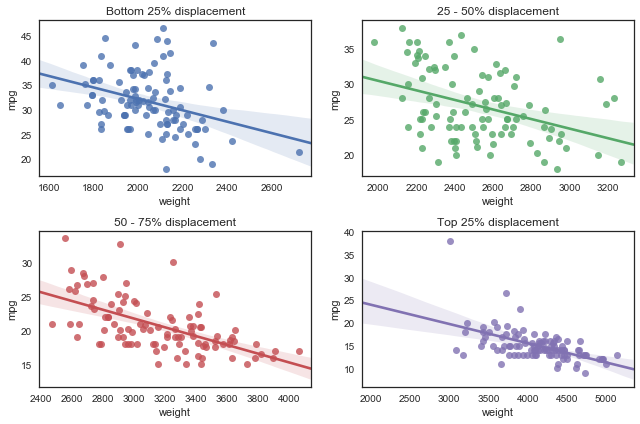

In [58]:
p1 = auto[auto.displacement < auto.displacement.describe()['25%']]

p2 = auto[auto.displacement < auto.displacement.describe()['50%']]
p2 = p2[p2.displacement >= auto.displacement.describe()['25%']]

p3 = auto[auto.displacement < auto.displacement.describe()['75%']]
p3 = p3[p3.displacement >= auto.displacement.describe()['50%']]

p4 = auto[auto.displacement >= auto.displacement.describe()['75%']]

f, ax = plt.subplots(2,2)

sns.regplot(p1.weight, p1.mpg, ax = ax[0][0]).set_title('Bottom 25% displacement')
sns.regplot(p2.weight, p2.mpg, ax = ax[0][1]).set_title('25 - 50% displacement')
sns.regplot(p3.weight, p3.mpg, ax = ax[1][0]).set_title('50 - 75% displacement')
sns.regplot(p4.weight, p4.mpg, ax = ax[1][1]).set_title('Top 25% displacement')

f.tight_layout(rect = (0,0,1.5,1.5))
f.show()

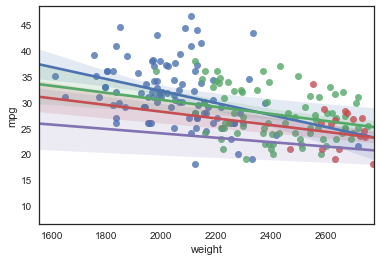

In [54]:
sns.regplot(p1.weight, p1.mpg)
sns.regplot(p2.weight, p2.mpg)
sns.regplot(p3.weight, p3.mpg)
sns.regplot(p4.weight, p4.mpg)

In [ ]:
##up to question 10